In [2]:
import os
import sys
print(os.path.abspath(''))

pkg_path = os.path.abspath('..')
print(pkg_path)
sys.path.insert(0, pkg_path)

import pyolin

/home/campus.ncl.ac.uk/b8051106/my/src/python/pyolin/notebooks
/home/campus.ncl.ac.uk/b8051106/my/src/python/pyolin


1. Reading data from a Cello UCF file

In [3]:
from pyolin.ucf import UCF

data = UCF("../ucf/Eco1C1G1T1.UCF.json");

2. Getting gate from the data

In [4]:
AmtR = data["A1_AmtR"]

3. Plotting a gate

/home/campus.ncl.ac.uk/b8051106/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """Entry point for launching an IPython kernel.


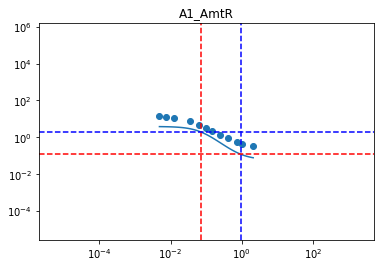

In [5]:
AmtR.quickplot.show()

4. Plotting all the gates in the UCF data

In [6]:
names = data.names
for name in names:
    #data[name].quickplot.show()
    pass

There are 20 valid gates.
There are 158 compatible pairs


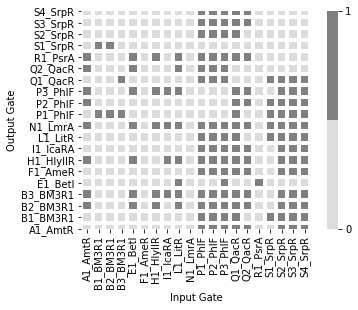

In [11]:
from pyolin.plotting import compatibility_heatmap
import numpy
import seaborn

names = data.names
gates = [data[name] for name in names if data[name].has_valid_thresholds]
heatmap = compatibility_heatmap(gates)

print(f"There are {len(gates)} valid gates.")

compatible_count = 0
for a in gates:
    for b in gates:
        if a.is_compatible_with(b):
            compatible_count += 1
            
print(f"There are {compatible_count} compatible pairs")

ils = [gate.il for gate in gates]
ihs = [gate.ih for gate in gates]
ols = [gate.ol for gate in gates]
ohs = [gate.oh for gate in gates]

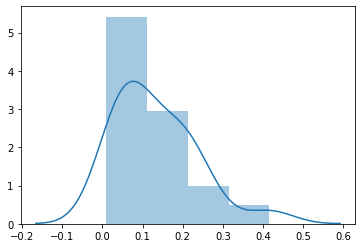

In [19]:
seaborn.distplot(ils)

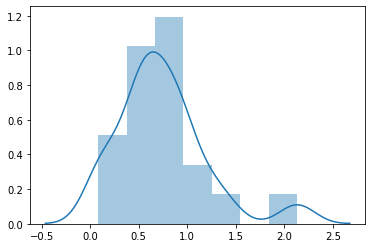

In [15]:
seaborn.distplot(ihs)

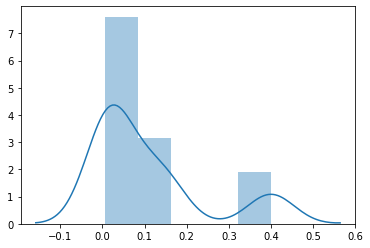

In [16]:
seaborn.distplot(ols)

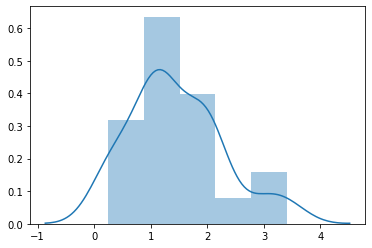

In [17]:
seaborn.distplot(ohs)

5. Some properties of the gates

In [7]:
AmtR.ys
AmtR.dynamic_input_range
AmtR.dynamic_output_range
AmtR.name
AmtR.hill_function
AmtR.params
len(names)

20

6. Get a gate from a simple csv file of form:

    xs,n,n,n,n,...,n
    
    gate1,n,n,n,...,n
    
    gate2,n,n,n,...,n
    
    .
    
    .
    
    .

/home/campus.ncl.ac.uk/b8051106/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/campus.ncl.ac.uk/b8051106/my/src/python/pyolin/pyolin/gate.py:53: RuntimeWarning: invalid value encountered in double_scalars
  return ((k**n * ymax * (t - 1)) / (ymax - t * ymin))**(1 / n)
/home/campus.ncl.ac.uk/b8051106/my/src/python/pyolin/pyolin/gate.py:66: RuntimeWarning: invalid value encountered in double_scalars
  return (k**n * (ymax - t * ymin) / (t * ymin - ymin))**(1 / n)


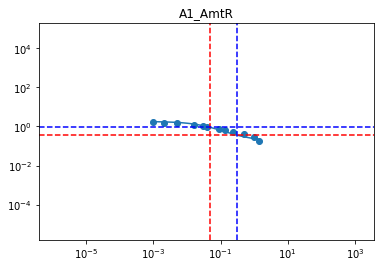

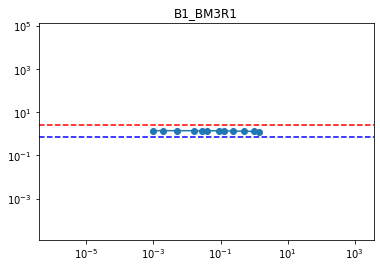

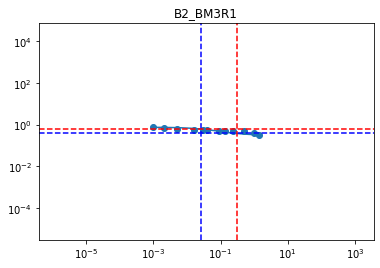

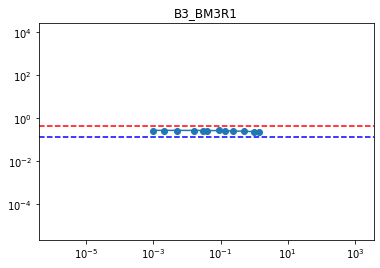

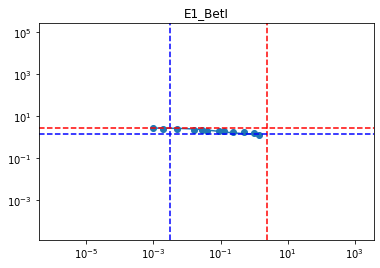

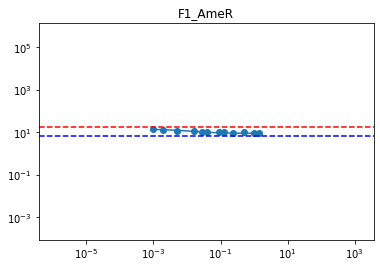

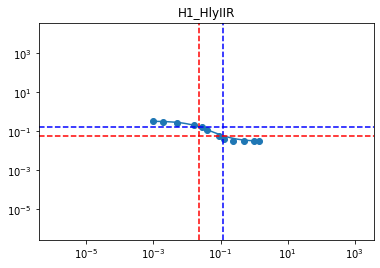

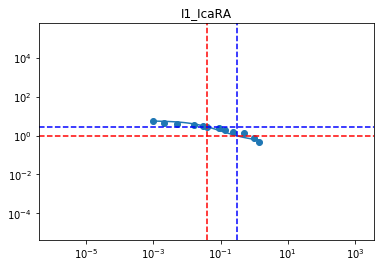

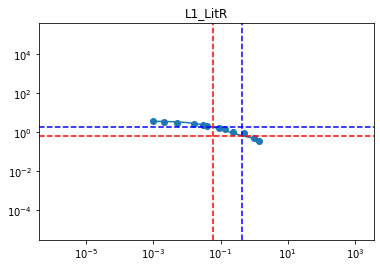

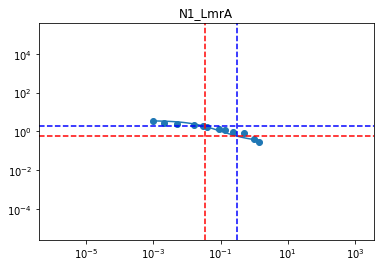

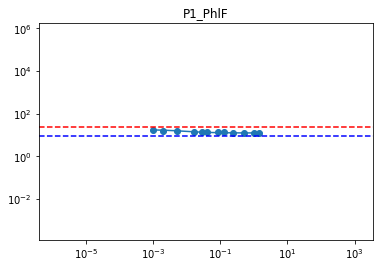

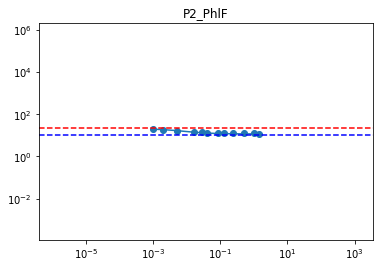

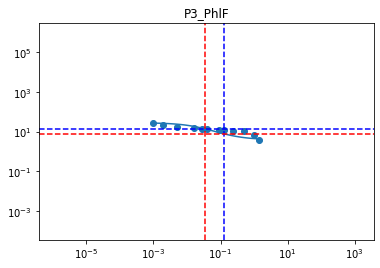

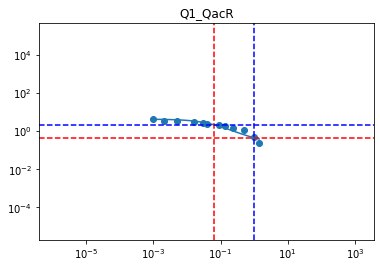

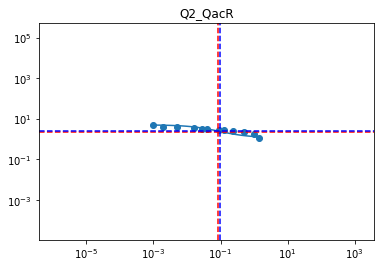

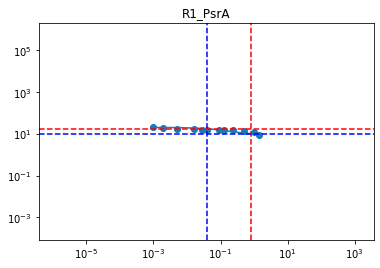

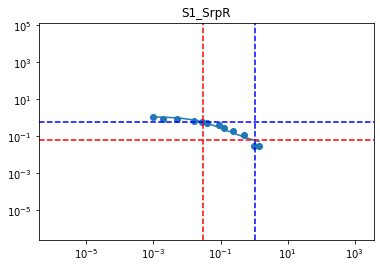

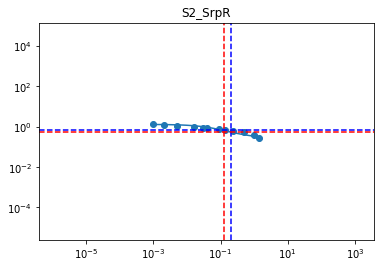

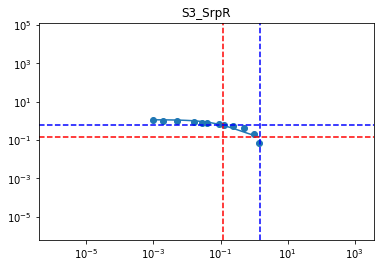

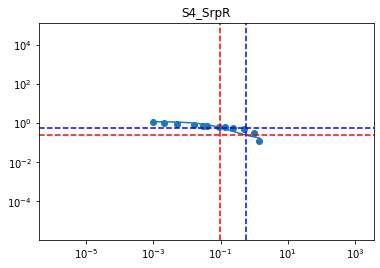

In [8]:
from pyolin.gate import Gate
for name in data.names:
    Gate.from_csv("../gates2.csv", name).quickplot.show()

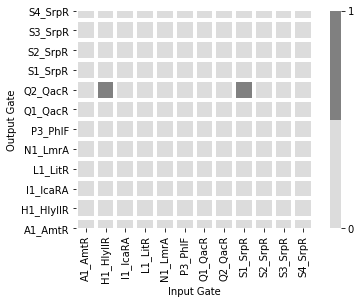

In [22]:
from pyolin.csvdata import CSVMedians
names = []
with open("../gates2.csv") as f:
    names = CSVMedians(f).names
    
putida_gates = [Gate.from_csv("../gates2.csv", name) for name in names]
heatmap = compatibility_heatmap(putida_gates)

In [10]:
for gate in putida_gates:
    print("Gate {} thresholds are valid: {}".format(gate.name, gate.has_valid_thresholds))

Gate F1_AmeR thresholds are valid: False
Gate A1_AmtR thresholds are valid: True
Gate E1_BetI thresholds are valid: False
Gate B1_BM3R1 thresholds are valid: False
Gate B2_BM3R1 thresholds are valid: False
Gate B3_BM3R1 thresholds are valid: False
Gate H1_HlyIIR thresholds are valid: True
Gate I1_IcaRA thresholds are valid: True
Gate L1_LitR thresholds are valid: True
Gate N1_LmrA thresholds are valid: True
Gate P1_PhlF thresholds are valid: False
Gate P2_PhlF thresholds are valid: False
Gate P3_PhlF thresholds are valid: True
Gate R1_PsrA thresholds are valid: False
Gate Q1_QacR thresholds are valid: True
Gate Q2_QacR thresholds are valid: True
Gate S1_SrpR thresholds are valid: True
Gate S2_SrpR thresholds are valid: True
Gate S3_SrpR thresholds are valid: True
Gate S4_SrpR thresholds are valid: True


In [11]:
for gate in putida_gates:
    if gate.has_valid_thresholds:
        print("Gate: {} => IL:{}, IH:{}, OL:{}, OH:{}".format(gate.name, gate.il, gate.ih, gate.ol, gate.oh))

Gate: A1_AmtR => IL:0.06476360097430062, IH:0.3332461798794853, OL:0.36, OH:0.895
Gate: H1_HlyIIR => IL:0.037559946789417306, IH:0.10155433190764687, OL:0.06, OH:0.165
Gate: I1_IcaRA => IL:0.05453818845231119, IH:0.4489630315802943, OL:0.96, OH:2.855
Gate: L1_LitR => IL:0.07176461298118489, IH:0.4284599973653157, OL:0.66, OH:1.81
Gate: N1_LmrA => IL:0.05060197099705601, IH:0.447159528070783, OL:0.58, OH:1.815
Gate: P3_PhlF => IL:0.055994111921914384, IH:0.20760149987463225, OL:7.84, OH:14.01
Gate: Q1_QacR => IL:0.07701869153508982, IH:1.1507258696434244, OL:0.44, OH:2.06
Gate: Q2_QacR => IL:0.11001908538661082, IH:0.12924000742343136, OL:2.36, OH:2.495
Gate: S1_SrpR => IL:0.04431002912269901, IH:0.935841593479997, OL:0.06, OH:0.565
Gate: S2_SrpR => IL:0.13922142971656973, IH:0.22910056354498765, OL:0.54, OH:0.65
Gate: S3_SrpR => IL:0.12028714744495592, IH:1.4904353123995093, OL:0.14, OH:0.565
Gate: S4_SrpR => IL:0.10406351524955393, IH:0.6327540180116552, OL:0.24, OH:0.58


Gate: S1_SrpR range:37.666666666666664
{'ymin': 0.03, 'ymax': 1.13, 'K': 0.028830580432614092, 'n': 1.0000000000000002}
Gate: A1_AmtR range:9.944444444444445
{'ymin': 0.18, 'ymax': 1.79, 'K': 0.03946099742699609, 'n': 1.0000000000000002}
Gate: L1_LitR range:10.969696969696969
{'ymin': 0.33, 'ymax': 3.62, 'K': 0.04748080667282563, 'n': 1.0000000000000002}
Gate: Q2_QacR range:4.228813559322035
{'ymin': 1.18, 'ymax': 4.99, 'K': 0.044117117078727904, 'n': 1.0000000000000002}
Gate: H1_HlyIIR range:11.000000000000002
{'ymin': 0.03, 'ymax': 0.33, 'K': 0.020026082226765628, 'n': 1.2472341975152137}


/home/campus.ncl.ac.uk/b8051106/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


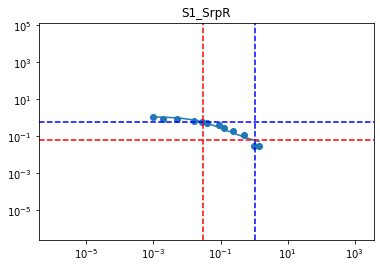

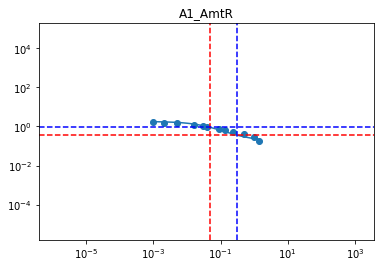

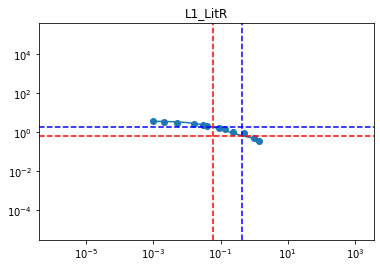

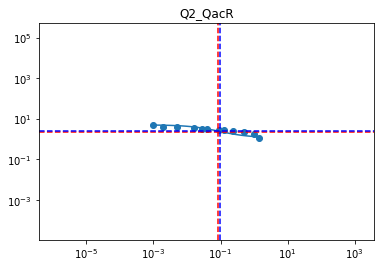

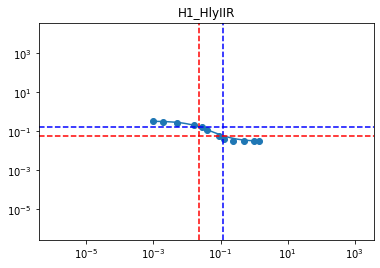

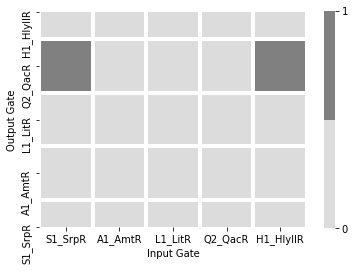

In [23]:
compat_names = ["S1_SrpR", "A1_AmtR", "L1_LitR", "Q2_QacR", "H1_HlyIIR"]
compat_gates = [Gate.from_csv("../gates2.csv", n) for n in compat_names]
for gate in compat_gates:
    print("Gate: {} range:{}".format(gate.name, gate.dynamic_output_range))
    print(gate.params)
    gate.quickplot.show()
    
heatmap = compatibility_heatmap(compat_gates)

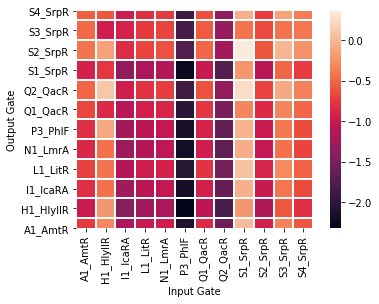

In [13]:
from pyolin.plotting import score_heatmap

putida_scores_heatmap = score_heatmap(putida_gates)

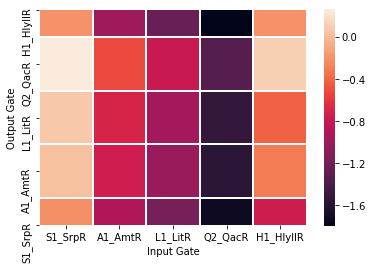

In [14]:
heatmap = score_heatmap(compat_gates)

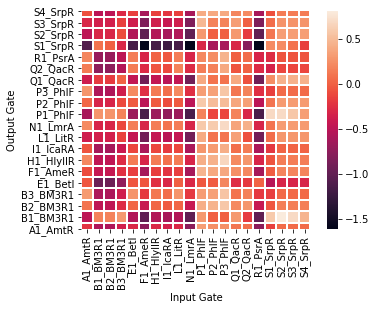

In [15]:
coli_scores_heatmap = score_heatmap(gates)

In [24]:
S1 = Gate.from_csv("../gates2.csv", "S1_SrpR")
A1 = Gate.from_csv("../gates2.csv", "A1_AmtR")
L1 = Gate.from_csv("../gates2.csv", "L1_LitR")
H1 = Gate.from_csv("../gates2.csv", "H1_HlyIIR")

In [25]:
print("S1 out low: {}, S1 out high: {}".format(S1.ol, S1.oh))

S1 out low: 0.06, S1 out high: 0.565


In [26]:
print("A1 in low: {}, A1 in high: {}".format(A1.il, A1.ih))

A1 in low: 0.04939523454148461, A1 in high: 0.3134957017811355


In [27]:
print("L1 in low: {}, L1 in high: {}".format(L1.il, L1.ih))

L1 in low: 0.058067743295820526, L1 in high: 0.42588844773201145


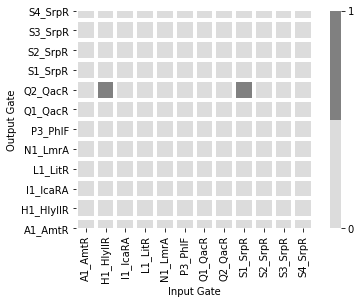

In [29]:
putida_compat_heatmap = compatibility_heatmap(putida_gates, offset=0.0)

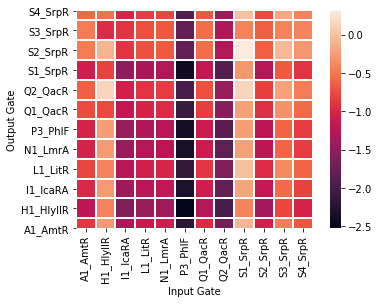

In [30]:
putida_scores_heatmap = score_heatmap(putida_gates, offset=0.0)

### Score

$$\min \left(\log{\left(\frac{IL}{OL}\right)}, \log{\left(\frac{OH}{IH}\right)}\right)$$